In [134]:
import numpy as np
import pandas as pd

from utils.cox_hazard_generating import time_failure_calculation

In [135]:
PATH = "/Users/davidlee/Documents/GitHub/Surtimesurvival/Data Project/Pycox Lib/support2_data_pycox_processed.csv"

In [136]:
df = pd.read_csv(PATH)

In [137]:
df.head()

,event,time,x0,x7,x8,x9,x10,x11,x12,x13,...,x2_9.0,x3_1.0,x3_2.0,x3_3.0,x3_4.0,x3_5.0,x4_1.0,x5_1.0,x6_1.0,x6_2.0
0,1,30.0,1.285896,2.712545,-1.340135,-0.764142,0.862546,0.730526,0.716630,-0.399353,...,0,1,0,0,0,0,0,0,0,0
1,0,1527.0,1.090666,-1.097247,-0.961532,-0.764142,0.707008,0.730526,-0.253960,-0.517393,...,0,1,0,0,0,0,0,0,1,0
2,1,96.0,-2.511770,0.088821,1.467837,2.248417,0.147064,-1.246333,-0.771692,-0.340261,...,0,0,0,1,0,0,0,0,1,0
3,0,892.0,-0.611591,-1.061305,0.079626,-0.556379,-0.885730,-0.422642,-0.394241,-0.576414,...,0,0,0,1,0,0,0,0,0,0
4,1,7.0,0.587001,-0.701891,1.183885,1.729010,1.179852,1.389479,-1.321610,-0.812530,...,0,1,0,0,0,0,0,0,0,0


In [138]:
df

,event,time,x0,x7,x8,x9,x10,x11,x12,x13,...,x2_9.0,x3_1.0,x3_2.0,x3_3.0,x3_4.0,x3_5.0,x4_1.0,x5_1.0,x6_1.0,x6_2.0
0,1,30.0,1.285896,2.712545,-1.340135,-0.764142,0.862546,0.730526,0.716630,-0.399353,...,0,1,0,0,0,0,0,0,0,0
1,0,1527.0,1.090666,-1.097247,-0.961532,-0.764142,0.707008,0.730526,-0.253960,-0.517393,...,0,1,0,0,0,0,0,0,1,0
2,1,96.0,-2.511770,0.088821,1.467837,2.248417,0.147064,-1.246333,-0.771692,-0.340261,...,0,0,0,1,0,0,0,0,1,0
3,0,892.0,-0.611591,-1.061305,0.079626,-0.556379,-0.885730,-0.422642,-0.394241,-0.576414,...,0,0,0,1,0,0,0,0,0,0
4,1,7.0,0.587001,-0.701891,1.183885,1.729010,1.179852,1.389479,-1.321610,-0.812530,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8868,1,36.0,1.180564,0.951415,0.395129,1.105722,1.976221,-0.422642,0.069570,-0.163129,...,0,1,0,0,0,0,0,0,1,0
8869,1,49.0,0.636048,-1.133188,-0.740680,0.482434,-1.924746,0.236311,-0.480494,0.072951,...,0,1,0,0,0,0,0,0,1,0
8870,1,6.0,0.038450,0.376352,0.395129,-0.140854,1.260730,-0.916857,-0.491236,-0.163129,...,0,1,0,0,0,0,0,0,0,1
8871,1,10.0,0.818214,0.879532,0.395129,0.690197,-0.730192,0.401049,0.328226,-0.517393,...,0,1,0,0,0,0,1,0,0,1


In [139]:
df_temp = df.loc[0:, ['event', 'time']]
df = df.drop(columns=['event', 'time'])

In [140]:
len(list(df.columns))

27

In [141]:
# For testing - we can do generate a list of Beta in this function
beta_list = np.random.uniform(-1, 5,
                              27)  # because SUPPORT2 have 14 features - to save time we have generated random 14 numbers between -3 and 20

In [142]:
k = 1.5  # Sharp para
g = 1.0  # Scale para or called lambda

In [143]:
z_generated, features_df, list_failure_time, full_generated_data = time_failure_calculation(n_generate=9000,
                                                                                            features=[], path=PATH,
                                                                                            beta_list=beta_list, k=k,
                                                                                            g=g)

In [144]:
full_generated_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,duration
0,-2.174019,2.541770,2.349985,1.926541,2.113214,5.361990,9.042348,10.623112,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9.144183e-36
1,1.181788,3.000506,0.967159,0.639758,-3.555890,-1.011684,-0.827339,7.708757,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.018664e-09
2,0.937591,-1.199875,5.551287,3.440422,2.380196,-3.164747,19.229477,4.414279,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,9.686803e-38
3,-0.015757,0.465161,5.091430,5.269735,1.681885,-2.523305,5.497145,-0.428923,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.194444e-19
4,1.507253,2.842584,1.257552,-0.169341,-3.501084,4.360047,11.552862,3.603461,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.093607e-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2.113111,0.264590,-2.275328,6.802495,3.047447,1.640089,12.422183,0.120226,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.423417e-34
8996,1.824633,1.691854,0.764278,1.107757,-0.966757,-3.586250,12.048950,2.395340,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.700814e-20
8997,1.821471,-0.593212,0.672314,-2.034121,-0.560442,1.538469,2.735402,6.342619,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.951702e-16
8998,-1.070891,0.180700,-0.400908,-1.217131,0.949634,4.199508,3.740246,9.081050,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.898401e-18


In [145]:
# def generate_event_time_random(df):


In [146]:
df_new = full_generated_data
df_new['duration'].head()

0    9.144183e-36
1    1.018664e-09
2    9.686803e-38
3    4.194444e-19
4    1.093607e-30
Name: duration, dtype: float64

In [147]:
print(len(df_new['duration']))

9000


In [148]:
df_new['duration_new'] = df_new['duration']
df_new['event'] = df_new['duration']

In [149]:
for i in range(len(df_new['duration'])):
    value_min = df_new['duration'][i] - (df_new['duration'][i]/2)
    value_max = df_new['duration'][i] + (df_new['duration'][i]/5)
    df_new['duration_new'][i] = np.random.uniform(low=value_min, high=value_max)
    if df_new['duration_new'][i] > df_new['duration'][i]:
        df_new['event'][i] = 0
    else:
        df_new['event'][i] = 1
    df_new['duration_new'][i] = df_new['duration_new'][i]*10000

In [150]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,duration,duration_new,event
0,-2.174019,2.541770,2.349985,1.926541,2.113214,5.361990,9.042348,10.623112,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9.144183e-36,5.138749e-32,1.0
1,1.181788,3.000506,0.967159,0.639758,-3.555890,-1.011684,-0.827339,7.708757,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.018664e-09,8.375505e-06,1.0
2,0.937591,-1.199875,5.551287,3.440422,2.380196,-3.164747,19.229477,4.414279,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,9.686803e-38,1.019636e-33,0.0
3,-0.015757,0.465161,5.091430,5.269735,1.681885,-2.523305,5.497145,-0.428923,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.194444e-19,4.992521e-15,0.0
4,1.507253,2.842584,1.257552,-0.169341,-3.501084,4.360047,11.552862,3.603461,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.093607e-30,1.196882e-26,0.0


In [151]:
len(df_new.loc[df_new['event'] == 1])

6483

In [152]:
df_new['duration'] = df_new['duration_new']
df_new = df_new.drop(columns=['duration_new'])

In [153]:
df_new.columns = df_new.columns.astype(str)

In [154]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,duration,event
0,-2.174019,2.541770,2.349985,1.926541,2.113214,5.361990,9.042348,10.623112,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.138749e-32,1.0
1,1.181788,3.000506,0.967159,0.639758,-3.555890,-1.011684,-0.827339,7.708757,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,8.375505e-06,1.0
2,0.937591,-1.199875,5.551287,3.440422,2.380196,-3.164747,19.229477,4.414279,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.019636e-33,0.0
3,-0.015757,0.465161,5.091430,5.269735,1.681885,-2.523305,5.497145,-0.428923,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.992521e-15,0.0
4,1.507253,2.842584,1.257552,-0.169341,-3.501084,4.360047,11.552862,3.603461,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.196882e-26,0.0


In [155]:
import pdb
from collections import defaultdict
import matplotlib.pyplot as plt

from SurvTRACE.survtrace.dataset import load_data
from SurvTRACE.survtrace.evaluate_utils import Evaluator
from SurvTRACE.survtrace.utils import set_random_seed
from SurvTRACE.survtrace.model import SurvTraceSingle
from SurvTRACE.survtrace.train_utils import Trainer
from SurvTRACE.survtrace.config import STConfig

# define the setup parameters
STConfig['data'] = 'support'

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 128,
    'weight_decay': 0,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [156]:
import numpy as np
from SurvTRACE.survtrace.config import STConfig
from SurvTRACE.survtrace.utils import LabelTransform
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler


def test_support2_pycox(df):
    get_target = lambda df: (df['duration'].values, df['event'].values)
    horizons = [.25, .5, .75]
    times = np.quantile(df["duration"][df["event"] == 1.0], horizons).tolist()
    # cols_categorical = ['x1_1.0','x2_1.0','x2_2.0','x2_3.0','x2_4.0','x2_5.0','x2_6.0','x2_7.0','x2_8.0','x2_9.0','x3_1.0','x3_2.0','x3_3.0','x3_4.0','x3_5.0','x4_1.0','x5_1.0','x6_1.0','x6_2.0']
    # cols_standardize = ['x0', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']

    cols_standardize = ["1", "2", "3", "4", "5", "6"]
    cols_categorical = ["7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22",
                        "23", "24", "25", "26"]

    df_feat = df.drop(["duration", "event"], axis=1)
    df_feat_standardize = df_feat[cols_standardize]
    df_feat_standardize_disc = StandardScaler().fit_transform(df_feat_standardize)
    df_feat_standardize_disc = pd.DataFrame(df_feat_standardize_disc, columns=cols_standardize)

    df_feat = pd.concat([df_feat[cols_categorical], df_feat_standardize], axis=1)

    vocab_size = 0
    for i, feat in enumerate(cols_categorical):
        df_feat[feat] = LabelEncoder().fit_transform(df_feat[feat]).astype(float) + vocab_size
        vocab_size = df_feat[feat].max() + 1

    # get the largest duraiton time
    max_duration_idx = df["duration"].argmax()
    # df_test = df_feat.drop(max_duration_idx).sample(frac=0.2)
    # df_train = df_feat.drop(df_test.index)
    # df_val = df_train.drop(max_duration_idx).sample(frac=0.2)
    # df_train = df_train.drop(df_val.index)

    # # Hung edited here
    df_train = df_feat.iloc[3550:]  #
    df_train = df_train.sample(frac=1)

    df_remaining = df_feat.iloc[:3549]  #
    df_remaining = df_remaining.sample(frac=1)

    # Now let's say you want to split the remaining data into test and validation sets
    df_test = df_remaining.sample(frac=0.5)  # 20% of the training data for testing
    df_val = df_remaining.drop(df_test.index)  # 20% of the training data for validating

    # assign cuts
    # labtrans = LabTransDiscreteTime(cuts=np.array([0]+times+[df["duration"].max()]))
    labtrans = LabelTransform(cuts=np.array([0] + times + [df["duration"].max()]))

    labtrans.fit(*get_target(df.loc[df_train.index]))
    # y = labtrans.fit_transform(*get_target(df)) # y = (discrete duration, event indicator)
    y = labtrans.transform(*get_target(df))  # y = (discrete duration, event indicator)
    df_y_train = pd.DataFrame(
        {"duration": y[0][df_train.index], "event": y[1][df_train.index], "proportion": y[2][df_train.index]},
        index=df_train.index)
    df_y_val = pd.DataFrame(
        {"duration": y[0][df_val.index], "event": y[1][df_val.index], "proportion": y[2][df_val.index]},
        index=df_val.index)
    # df_y_test = pd.DataFrame({"duration": y[0][df_test.index], "event": y[1][df_test.index], "proportion":y[2][df_test.index]}, index=df_test.index)
    df_y_test = pd.DataFrame({"duration": df['duration'].loc[df_test.index], "event": df['event'].loc[df_test.index]})
    STConfig['labtrans'] = labtrans
    STConfig['num_numerical_feature'] = int(len(cols_standardize))
    STConfig['num_categorical_feature'] = int(len(cols_categorical))
    STConfig['num_feature'] = int(len(df_train.columns))
    STConfig['vocab_size'] = int(vocab_size)
    STConfig['duration_index'] = labtrans.cuts
    STConfig['out_feature'] = int(labtrans.out_features)
    print("______")
    print(int(len(cols_standardize)))
    print("______")
    print(int(len(cols_categorical)))
    print("______")
    print(int(len(df_train.columns)))
    print("______")
    print(int(vocab_size))
    print("______")
    print(labtrans.cuts)
    print("______")
    print(int(labtrans.out_features))

    return y, df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val

In [157]:
y, df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = test_support2_pycox(df_new)

______
6
______
20
______
26
______
9038
______
[0.00000000e+00 6.46160308e-28 8.42286404e-21 9.39341566e-14
 2.05574769e+14]
______
4


In [160]:
# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
        batch_size=hparams['batch_size'],
        epochs=hparams['epochs'],
        learning_rate=hparams['learning_rate'],
        weight_decay=hparams['weight_decay'],)

GPU not found! will use cpu for training!
[Train-0]: 17.876666424795985
[Val-0]: 0.06883726269006729
[Train-1]: -20.29337038192898
[Val-1]: -0.28298062086105347
[Train-2]: -41.93057310581207
[Val-2]: -0.20924939215183258
EarlyStopping counter: 1 out of 5
[Train-3]: -56.607221841812134
[Val-3]: -0.24401992559432983
EarlyStopping counter: 2 out of 5
[Train-4]: -64.49850898981094
[Val-4]: -0.13463546335697174
EarlyStopping counter: 3 out of 5
[Train-5]: -70.05593740940094
[Val-5]: -0.06522385030984879
EarlyStopping counter: 4 out of 5
[Train-6]: -75.87351036071777
[Val-6]: 1.1514232158660889
EarlyStopping counter: 5 out of 5
early stops at epoch 7


In [161]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

******************************
start evaluation
******************************
For 0.25 quantile,
TD Concordance Index - IPCW: 0.9379852015650768
Brier Score: 0.055575547721831264
For 0.5 quantile,
TD Concordance Index - IPCW: 0.9039584334017075
Brier Score: 0.09316603277539362
For 0.75 quantile,
TD Concordance Index - IPCW: 0.874134699309465
Brier Score: 0.09222816790421103
done


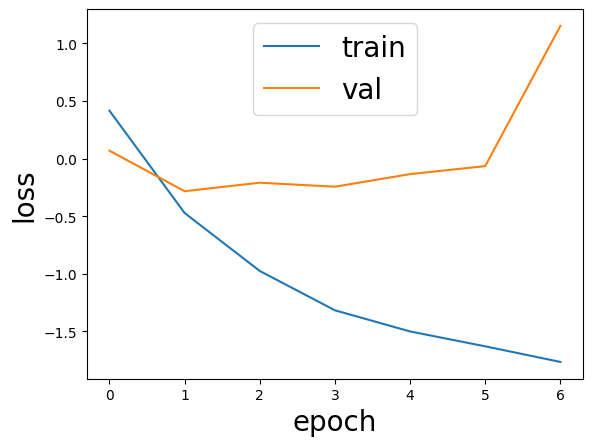

In [162]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()